In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv(r'D:\Machine learning\Workbook\K-Means Clustering\Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().T #describe the data

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [16]:
num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_cols.remove('CustomerID')
num_cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Age


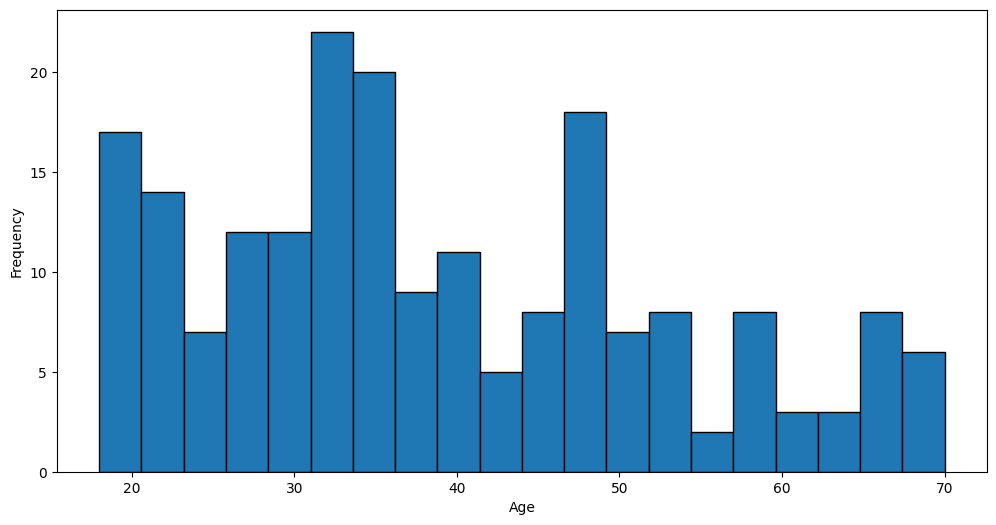

Annual Income (k$)


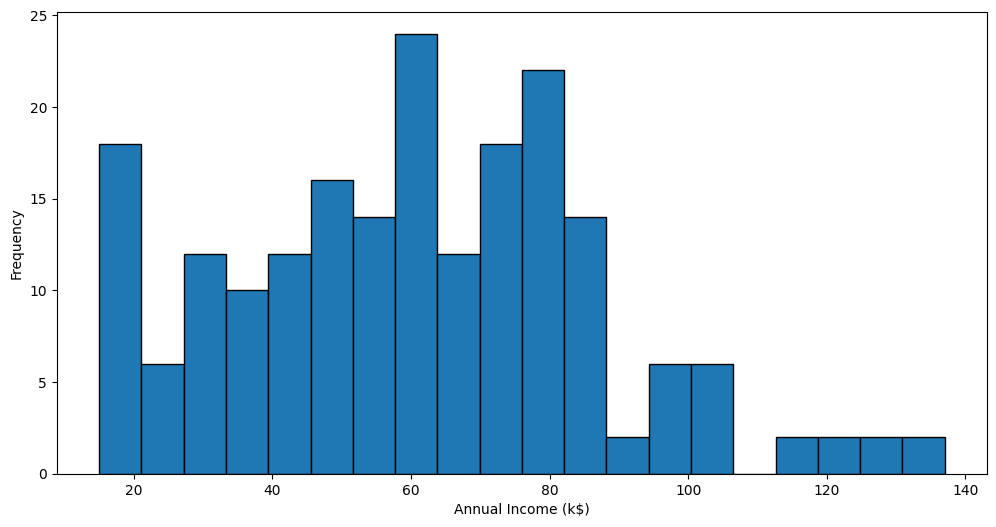

Spending Score (1-100)


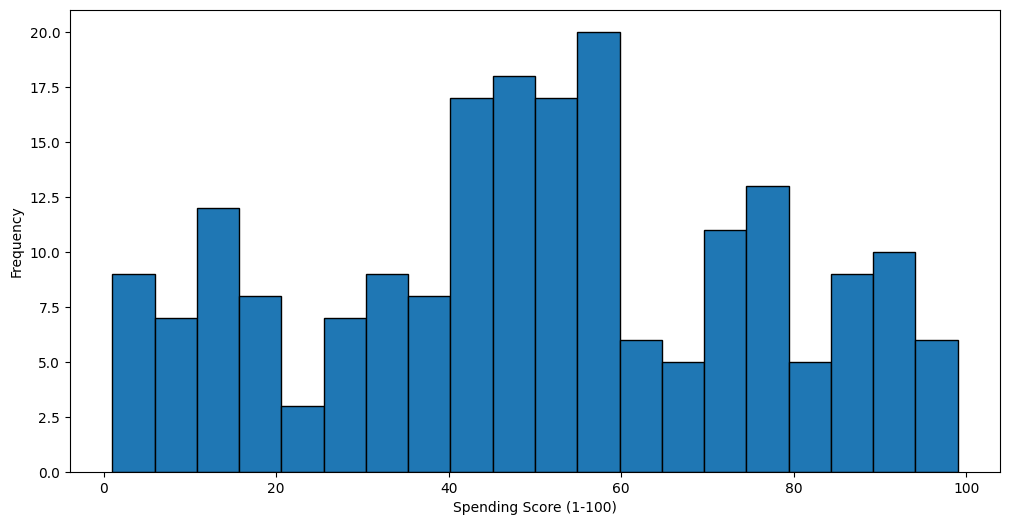

In [ ]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(12, 6))
    plt.hist(df[col], bins=20, edgecolor='black')

    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.show()

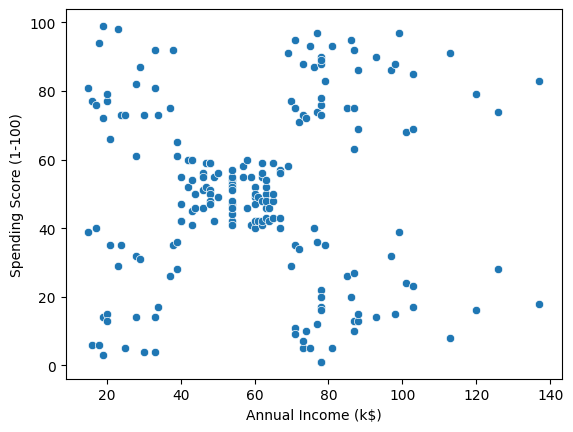

In [10]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, marker = 'o')
plt.show()

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
# to understand we take only two columns
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [26]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

In [27]:
sse

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

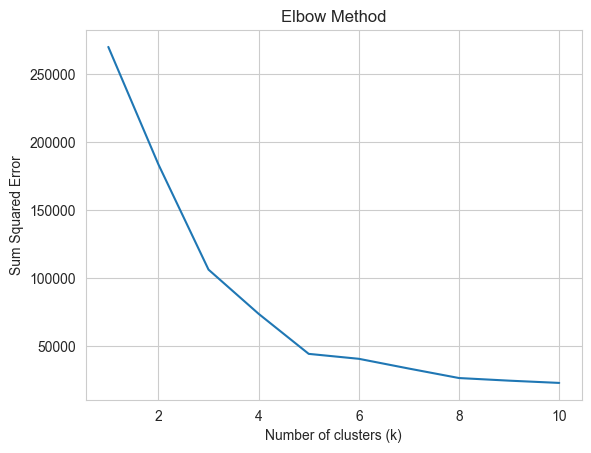

In [ ]:
# Plotting
sns.set_style("whitegrid")
plt.plot(range(1, 11), sse)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum Squared Error")
plt.title("Elbow Method")
plt.show()

#### **Fit the k-means Model on the Data**

In [17]:
kmeans = KMeans(n_clusters = 5, random_state = 42) #init='k-means++'
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [13]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

#### **Pridict**

In [18]:
pred = kmeans.predict(X)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

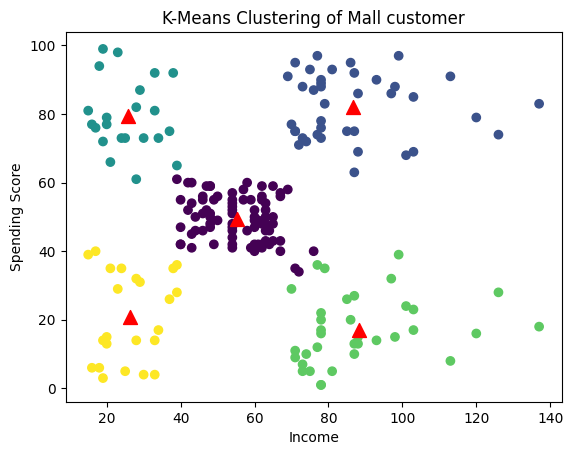

In [16]:
# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='^')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Mall customer')
plt.show()

- Inertia measures the sum of squared distances of samples to their closest cluster center.
- Silhouette score measures how similar an object is to its own cluster compared to other clusters.

**The silhouette score ranges from -1 to 1, and its interpretation is similar:**

- Silhouette Score Close to 1: Indicates that clusters are well-separated and distinct, and that data points are appropriately clustered with minimal overlap between clusters.
- Silhouette Score Close to 0: Indicates that clusters are not well-separated and may overlap. Points on average are on or near the boundary between clusters, suggesting the clustering structure is less clear.
- Silhouette Score Close to -1: Indicates that clusters are poorly defined, and data points may be in the wrong clusters, implying that the clustering is not capturing the true underlying structure of the data.

In [22]:
# Evaluate using different metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X, pred)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)

Inertia: 44448.4554479337
Silhouette Score: 0.553931997444648


- Average Silhouette Score = 0.6 to 1.0: Strong clustering structure.
- Average Silhouette Score = 0.3 to 0.5: Reasonable clustering structure.
- Average Silhouette Score < 0.3: Weak clustering structure; the algorithm may have failed to find meaningful clusters.

In [34]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [20]:
new_point = [[60,50]] 

# Predict the cluster for the new point
predicted_cluster = kmeans.predict(new_point)
print(f'The new point {new_point} belongs to cluster {predicted_cluster[0]}')

The new point [[60, 50]] belongs to cluster 0


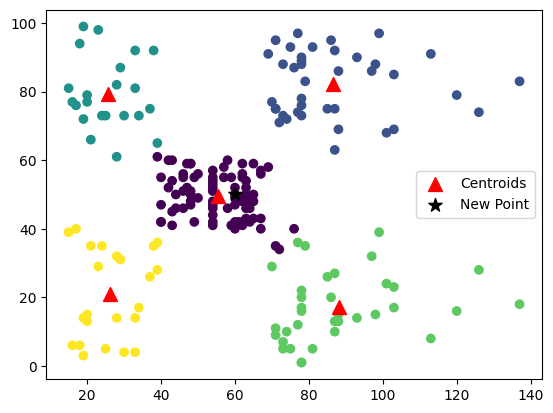

In [21]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='^', label='Centroids')
plt.scatter(new_point[0][0], new_point[0][1], c='black', s=100, marker='*', label='New Point')
plt.legend()
plt.show()